# USA Homicide  project
## Learning Crime Trends and Demographic Insights


## Problem Statement: 
In this project, I performed an Exploratory Data Analysis (EDA) on a dataset related to homicide cases in the United States. EDA is an essential phase in understanding the structure, patterns, and nuances of data, which would then drive further analytical or modeling efforts.



<a id="cont"></a>

## Table of Contents:
To structure the project, the following sections will be covered:

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Feature Engineering</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>


<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np  # used for numerical computations and data manipulation.
import pandas as pd  # for data manipulation and analysis.
import matplotlib.pyplot as plt  # for plotting data
import seaborn as sns  # for data visualization

 <a id="two"></a>
## 2. Loading the Data
<a href=#cont>Back to Table of Contents</a>

In [2]:
Homicide = pd.read_csv('homicide-data.csv', encoding='latin1')

# Display the first few rows of the DataFrame
Homicide.head()


,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest


In [3]:
Homicide['reported_date']

0        20100504
1        20100216
2        20100601
3        20100101
4        20100102
           ...   
52174    20160908
52175    20160913
52176    20161114
52177    20161130
52178    20160901
Name: reported_date, Length: 52179, dtype: int64

#### Explanation:

import pandas as pd: This imports the Pandas library and assigns it the alias 'pd' for easier reference in your code.

pd.read_csv('homicide-data.csv', encoding='latin1'): This line reads the CSV file 'homicide-data.csv' into a Pandas DataFrame named 'Homicide'. The encoding='latin1' parameter is used to specify the character encoding of the CSV file. You might need to specify the encoding if the file contains non-standard characters.

Homicide.head(): This line displays the first few rows of the DataFrame 'Homicide' using the head() method. By default, it displays the first 5 rows, but you can pass an integer as an argument to head() to display a different number of rows.

<a id="three"></a>
## 3. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [3]:
Homicide.isnull().sum()

uid               0
reported_date     0
victim_last       1
victim_first      0
victim_race       0
victim_age        0
victim_sex        0
city              0
state             0
lat              60
lon              60
disposition       0
dtype: int64

In [4]:
Homicide.shape

(52179, 12)

In [5]:
Homicide.dtypes

uid               object
reported_date      int64
victim_last       object
victim_first      object
victim_race       object
victim_age        object
victim_sex        object
city              object
state             object
lat              float64
lon              float64
disposition       object
dtype: object

In [35]:
# Convert 'victim_age' to numeric, coercing errors to NaN
Homicide['victim_age'] = pd.to_numeric(Homicide['victim_age'], errors='coerce')

# Convert 'victim_age' to integer type, filling NaN values with 0 (or any other desired value)
Homicide['victim_age'] = Homicide['victim_age'].fillna(0).astype(int)


<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [6]:
Homicide.describe()

,reported_date,lat,lon
count,5.217900e+04,52119.000000,52119.000000
mean,2.013090e+07,37.026786,-91.471094
std,1.123420e+06,4.348647,13.746378
min,2.007010e+07,25.725214,-122.507779
25%,2.010032e+07,33.765203,-95.997198
50%,2.012122e+07,38.524973,-87.710286
75%,2.015091e+07,40.027627,-81.755909
max,2.015111e+08,45.051190,-71.011519


In [7]:
Homicide['city'].unique() 

array(['Albuquerque', 'Atlanta', 'Baltimore', 'Baton Rouge', 'Birmingham',
       'Boston', 'Buffalo', 'Charlotte', 'Chicago', 'Cincinnati',
       'Columbus', 'Dallas', 'Denver', 'Detroit', 'Durham', 'Fort Worth',
       'Fresno', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City',
       'Las Vegas', 'Long Beach', 'Los Angeles', 'Louisville', 'Memphis',
       'Miami', 'Milwaukee', 'Minneapolis', 'Nashville', 'New Orleans',
       'New York', 'Oakland', 'Oklahoma City', 'Omaha', 'Philadelphia',
       'Phoenix', 'Pittsburgh', 'Richmond', 'San Antonio', 'Sacramento',
       'Savannah', 'San Bernardino', 'San Diego', 'San Francisco',
       'St. Louis', 'Stockton', 'Tampa', 'Tulsa', 'Washington'],
      dtype=object)

In [43]:
Homicide['victim_age'].unique() 

array([25, 45, 18, 38, 62, 51, 28, 70, 81, 55], dtype=int64)

In [8]:
Homicide['disposition'].unique() 

array(['Closed without arrest', 'Closed by arrest', 'Open/No arrest'],
      dtype=object)

In [9]:
Homicide['victim_race'].unique() 

array(['Hispanic', 'White', 'Other', 'Black', 'Asian', 'Unknown'],
      dtype=object)

In [10]:
# Count the occurrences of each unique value in the 'victim_race' column
race_counts = Homicide['victim_race'].value_counts()
race_counts

Black       33361
Hispanic     6901
White        6333
Unknown      4199
Other         700
Asian         685
Name: victim_race, dtype: int64

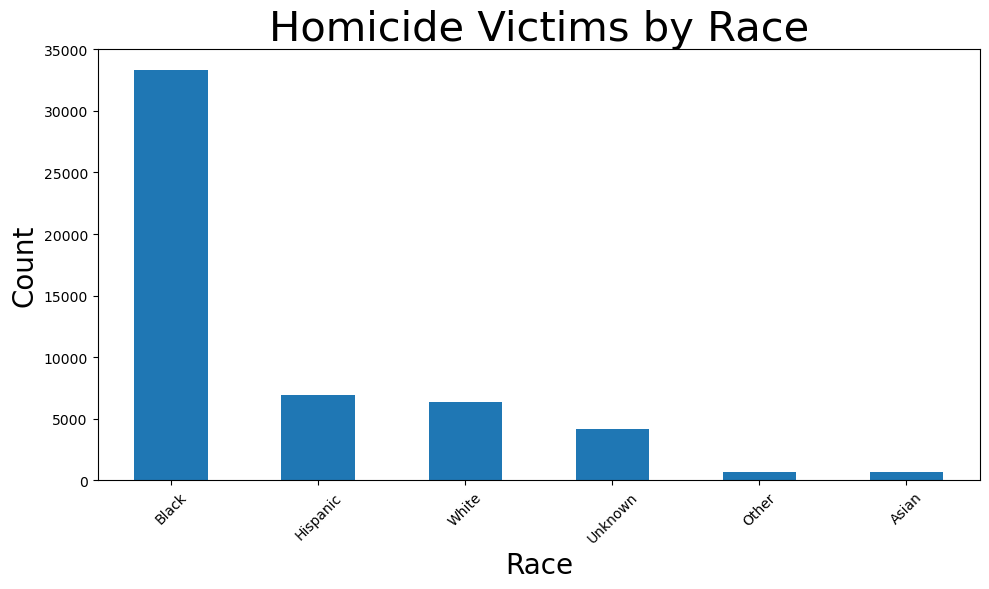

In [17]:
# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
race_counts.plot(kind='bar')
plt.title('Homicide Victims by Race', fontsize=30)
plt.xlabel('Race', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [46]:
race_summary = Homicide.groupby('victim_race')['victim_age'].describe()
print(race_summary)


             count unique      top  freq
victim_race                             
Asian          685     88       26    24
Black        33361    100       21  1559
Hispanic      6901     90       22   314
Other          700     73  Unknown    29
Unknown       4199     85  Unknown  2608
White         6333     99       23   176


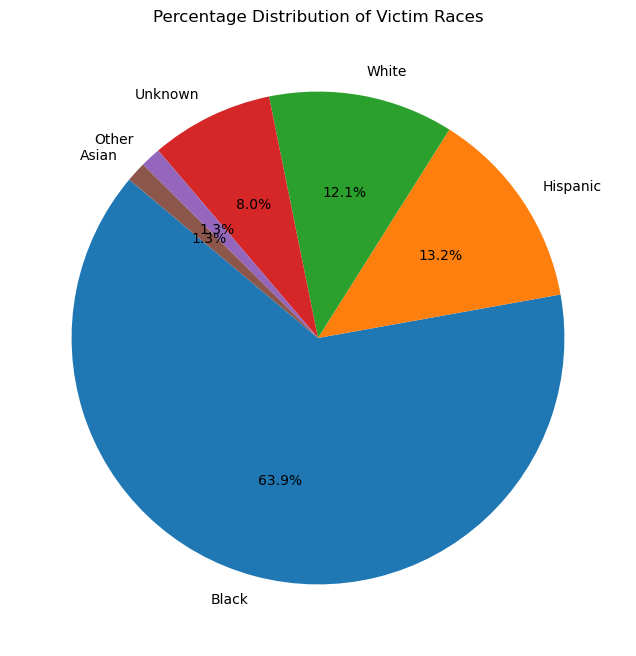

In [49]:
race_percentage = Homicide['victim_race'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(race_percentage, labels=race_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Victim Races')
plt.show()


In [12]:
# Count the occurrences of each unique city
city_counts = Homicide['city'].value_counts()
city_counts

Chicago           5535
Philadelphia      3037
Houston           2942
Baltimore         2827
Detroit           2519
Los Angeles       2257
St. Louis         1677
Dallas            1567
Memphis           1514
New Orleans       1434
Las Vegas         1381
Washington        1345
Indianapolis      1322
Kansas City       1190
Jacksonville      1168
Milwaukee         1115
Columbus          1084
Atlanta            973
Oakland            947
Phoenix            914
San Antonio        833
Birmingham         800
Nashville          767
Miami              744
Cincinnati         694
Charlotte          687
Oklahoma City      672
San Francisco      663
Pittsburgh         631
New York           627
Boston             614
Tulsa              584
Louisville         576
Fort Worth         549
Buffalo            521
Fresno             487
San Diego          461
Stockton           444
Richmond           429
Baton Rouge        424
Omaha              409
Albuquerque        378
Long Beach         378
Sacramento 

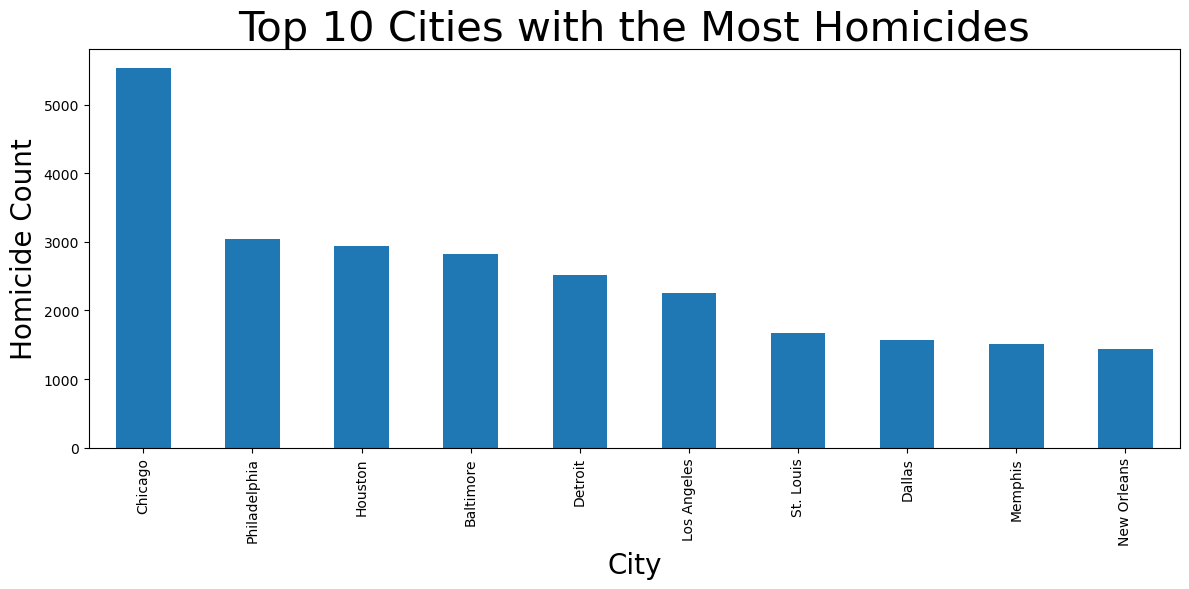

In [16]:
# Select the top 10 cities
top_10_cities = city_counts.head(10)

# Create a bar graph
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
top_10_cities.plot(kind='bar')
plt.title('Top 10 Cities with the Most Homicides', fontsize=30)
plt.xlabel('City', fontsize=20)
plt.ylabel('Homicide Count', fontsize=20)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


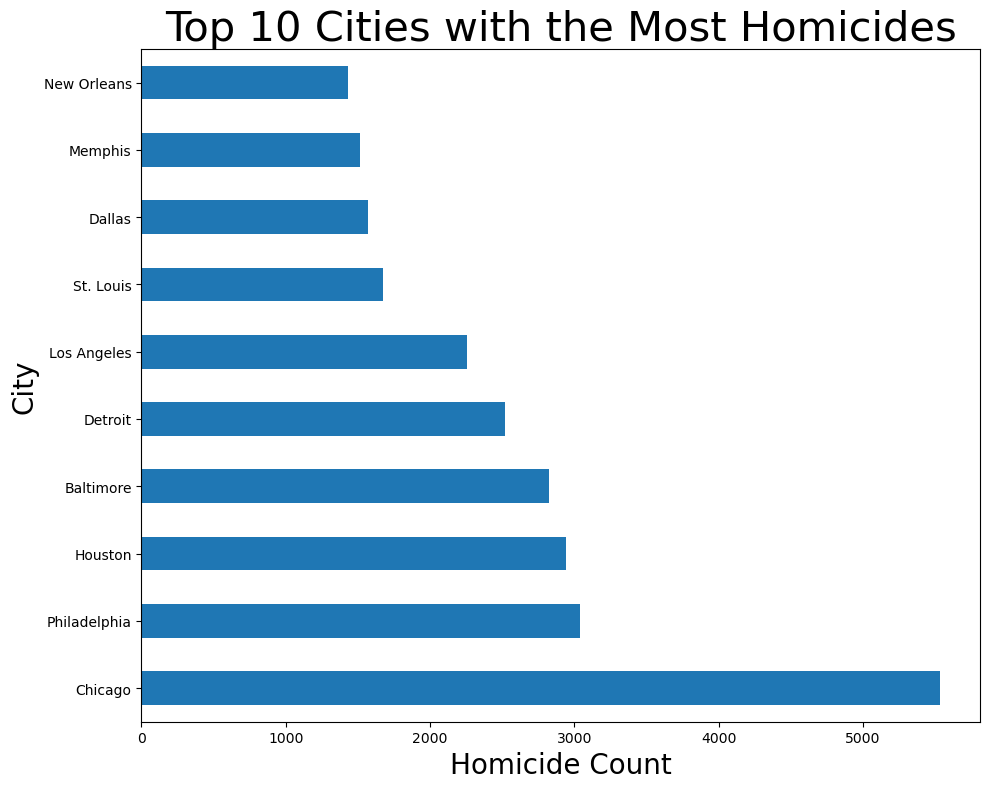

In [15]:
# Create a horizontal bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
top_10_cities.plot(kind='barh')
plt.title('Top 10 Cities with the Most Homicides', fontsize=30)
plt.xlabel('Homicide Count', fontsize=20)
plt.ylabel('City', fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


In [18]:
victim_sex_counts = Homicide['victim_sex'].value_counts()
victim_sex_counts

Male       40739
Female      7209
Unknown     4231
Name: victim_sex, dtype: int64

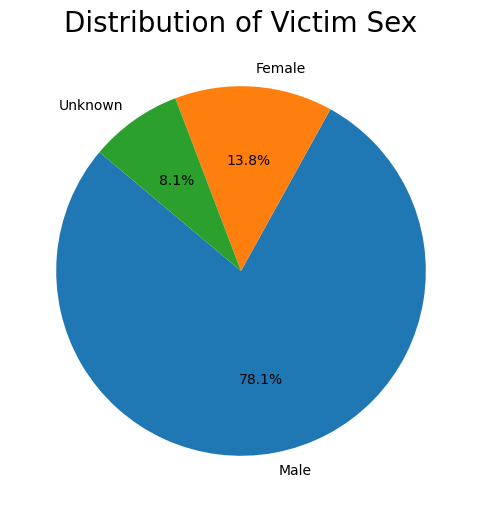

In [23]:
# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(victim_sex_counts, labels=victim_sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Victim Sex', fontsize=20)

# Display the pie chart
plt.show()

#### Explanation:

1. The `plt.figure(figsize=(6, 6))` line sets the size of the pie chart. You can adjust the `figsize` parameter to change the size as needed.

2. `plt.pie()` is used to create the pie chart. We provide `victim_sex_counts` as the data for the chart, `labels` as the corresponding labels for each category, `autopct` to display the percentage on each slice, and `startangle` to set the starting angle of the chart.

3. `plt.title()` is used to set the title of the pie chart.

4. Finally, `plt.show()` displays the chart.

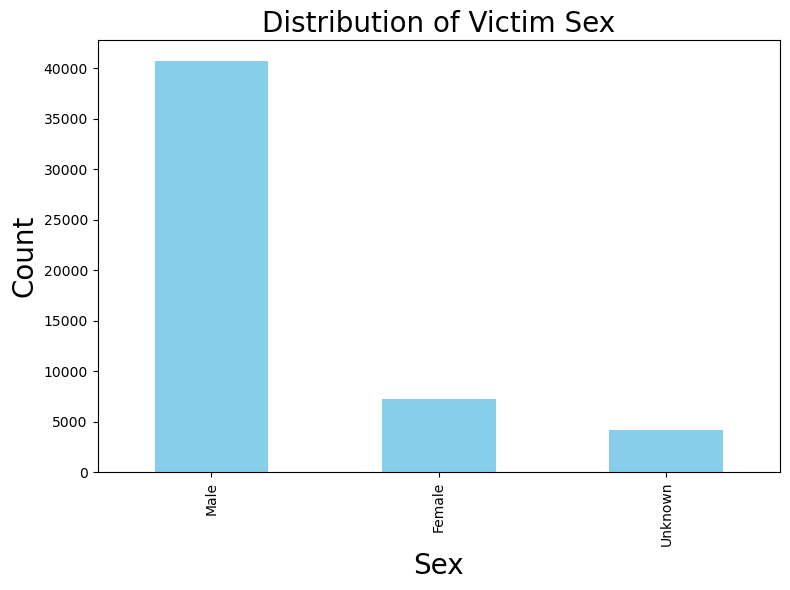

In [24]:
# Create a bar graph
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
victim_sex_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Victim Sex', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Display the bar graph
plt.tight_layout()  # Ensures that the labels fit within the figure
plt.show()

#### Explanation:

1. The `plt.figure(figsize=(8, 6))` line sets the size of the bar graph. You can adjust the `figsize` parameter to change the size as needed.

2. `victim_sex_counts.plot(kind='bar', color='skyblue')` is used to create the bar graph. We specify the kind as 'bar' and set the color to 'skyblue'.

3. `plt.title()` is used to set the title of the bar graph.

4. `plt.xlabel()` and `plt.ylabel()` set labels for the x-axis and y-axis, respectively.

5. `plt.tight_layout()` ensures that the labels fit within the figure, especially useful when dealing with long labels.

6. Finally, `plt.show()` displays the bar graph.

In [37]:
# Calculate summary statistics for victim_age
summary_stats = Homicide['victim_age'].describe()
print(summary_stats)


count    52179.000000
mean        29.973438
std         15.834626
min          0.000000
25%         21.000000
50%         27.000000
75%         39.000000
max        102.000000
Name: victim_age, dtype: float64


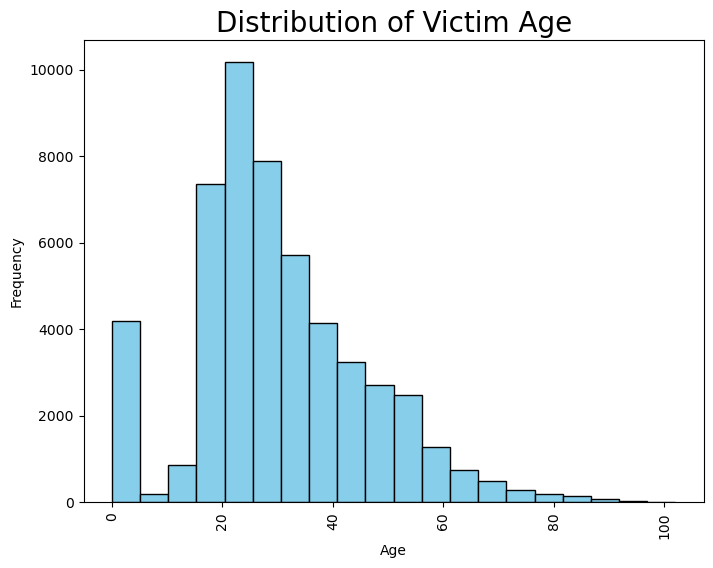

In [36]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(Homicide['victim_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Victim Age', fontsize=20)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()


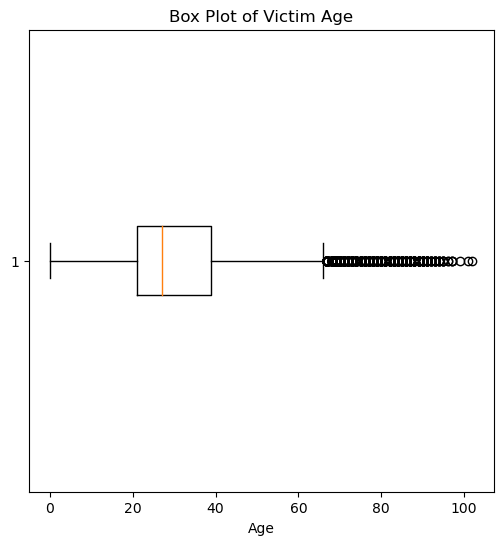

In [39]:
# Create a box plot
plt.figure(figsize=(6, 6))
plt.boxplot(Homicide['victim_age'], vert=False)
plt.title('Box Plot of Victim Age')
plt.xlabel('Age')
plt.show()


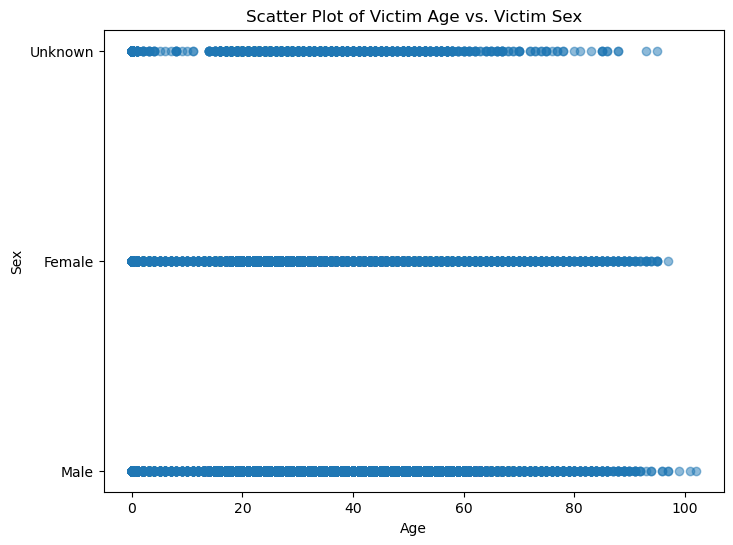

In [40]:
# Scatter plot of victim age vs. victim sex
plt.figure(figsize=(8, 6))
plt.scatter(Homicide['victim_age'], Homicide['victim_sex'], alpha=0.5)
plt.title('Scatter Plot of Victim Age vs. Victim Sex')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()


In [38]:
# Calculate mean age by victim sex
mean_age_by_sex = Homicide.groupby('victim_sex')['victim_age'].mean()
print(mean_age_by_sex)

# Calculate mean age by victim race
mean_age_by_race = Homicide.groupby('victim_race')['victim_age'].mean()
print(mean_age_by_race)


victim_sex
Female     33.636011
Male       31.163897
Unknown    12.270385
Name: victim_age, dtype: float64
victim_race
Asian       37.461314
Black       30.221546
Hispanic    29.878134
Other       32.595714
Unknown     12.182663
White       39.466446
Name: victim_age, dtype: float64


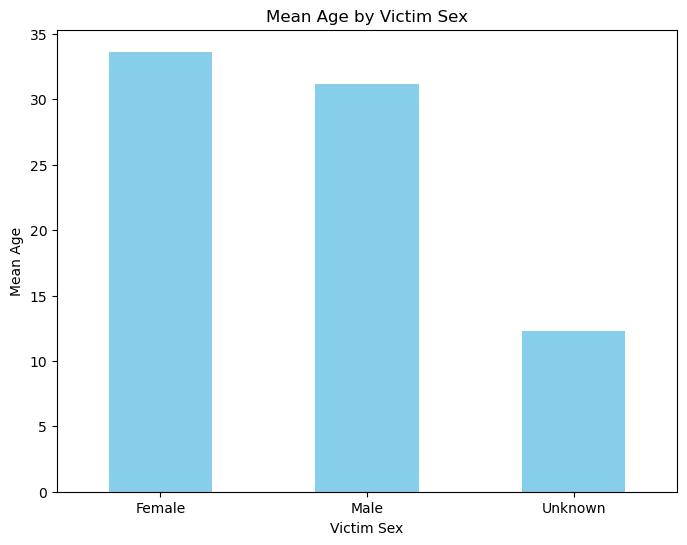

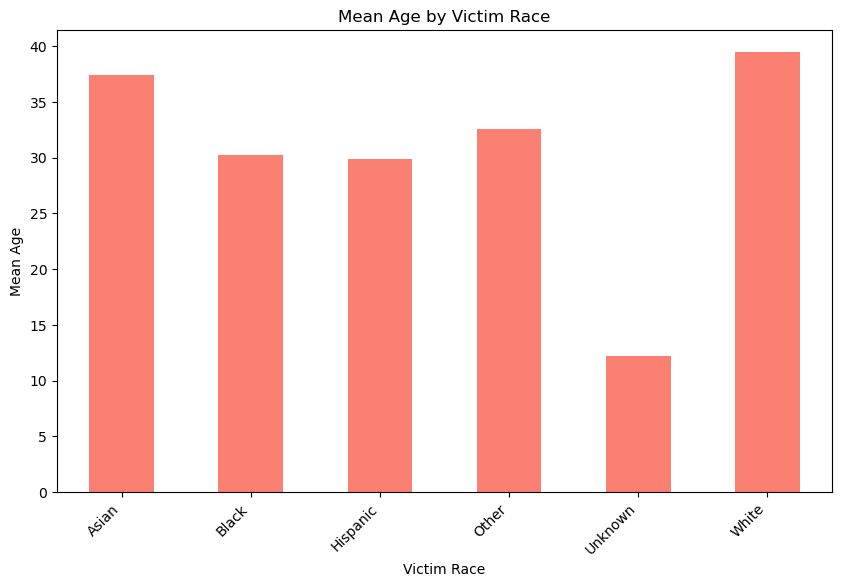

In [41]:
import matplotlib.pyplot as plt

# Calculate mean age by victim sex
mean_age_by_sex = Homicide.groupby('victim_sex')['victim_age'].mean()

# Create a bar graph for mean age by victim sex
plt.figure(figsize=(8, 6))
mean_age_by_sex.plot(kind='bar', color='skyblue')
plt.title('Mean Age by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Mean Age')
plt.xticks(rotation=0)
plt.show()

# Calculate mean age by victim race
mean_age_by_race = Homicide.groupby('victim_race')['victim_age'].mean()

# Create a bar graph for mean age by victim race
plt.figure(figsize=(10, 6))
mean_age_by_race.plot(kind='bar', color='salmon')
plt.title('Mean Age by Victim Race')
plt.xlabel('Victim Race')
plt.ylabel('Mean Age')
plt.xticks(rotation=45, ha='right')
plt.show()


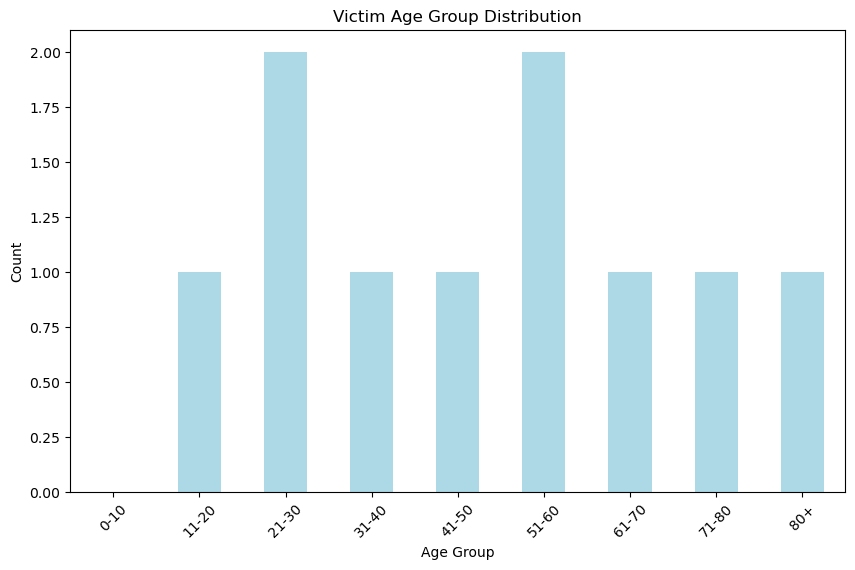

In [42]:

# Sample DataFrame with 'victim_age' column
data = {'victim_age': [25, 45, 18, 38, 62, 51, 28, 70, 81, 55]}
Homicide = pd.DataFrame(data)

# Define age group bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

# Categorize 'victim_age' into age groups
Homicide['age_group'] = pd.cut(Homicide['victim_age'], bins=bins, labels=labels, right=False)

# Count the occurrences of each age group
age_group_counts = Homicide['age_group'].value_counts().sort_index()

# Create a bar graph for age group counts
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='lightblue')
plt.title('Victim Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
